# Interrupted Time Series Analysis - Single Time Series Example (in R)

Import libraries need for ITS in R.

In [11]:
library(nlme)
library(car)
library(tseries)
library(ggplot2)
library(lmtest)
library(LSTS)
library(data.table)



Warning message:
"package 'tseries' was built under R version 3.4.4"Warning message in packageDescription("tseries", lib.loc = mylib):
"no package 'tseries' was found"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.4.4"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Warning message:
"package 'LSTS' was built under R version 3.4.4"

In [1]:
data <- read.csv(file="data/lysis.csv", header=TRUE, sep=",")

In [2]:
nrow(data)  # expecting 54 data points

[1] 54

## Plot data

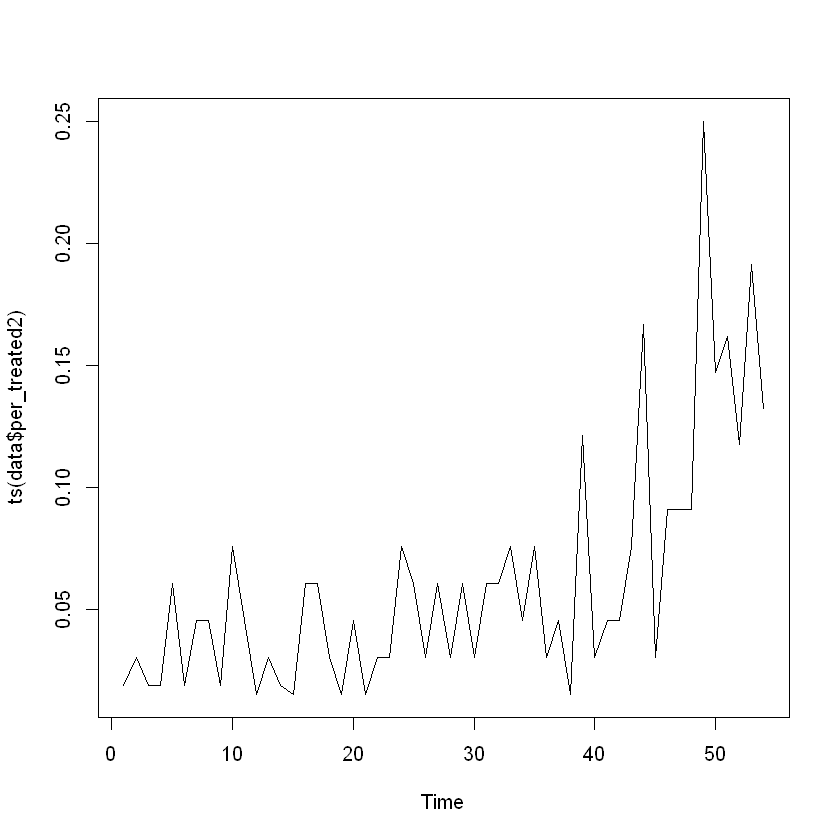

In [73]:
plot(ts(data$per_treated2))

Deal with increasing variance - Take natural log of DV

In [3]:
data$per_treated = log(data$per_treated2)

In [4]:
data

year,month,per_treated,time,or,or_trend,imp,imp_trend,per_treated2,lag1_treat_ln
2009,1,-3.970292,1,0,0,0,0,0.01886793,0.000000
2009,2,-3.496508,2,0,0,0,0,0.03030303,0.000000
2009,3,-3.970292,3,0,0,0,0,0.01886793,0.000000
2009,4,-3.970292,4,0,0,0,0,0.01886793,0.000000
2009,5,-2.803360,5,0,0,0,0,0.06060606,0.000000
2009,6,-3.970292,6,0,0,0,0,0.01886793,0.000000
2009,7,-3.091042,7,0,0,0,0,0.04545454,0.000000
2009,8,-3.091042,8,0,0,0,0,0.04545454,0.000000
2009,9,-3.970292,9,0,0,0,0,0.01886793,0.000000
2009,10,-2.580217,10,0,0,0,0,0.07575758,0.000000


## 1. Visual Impact Analysis of Interruptions

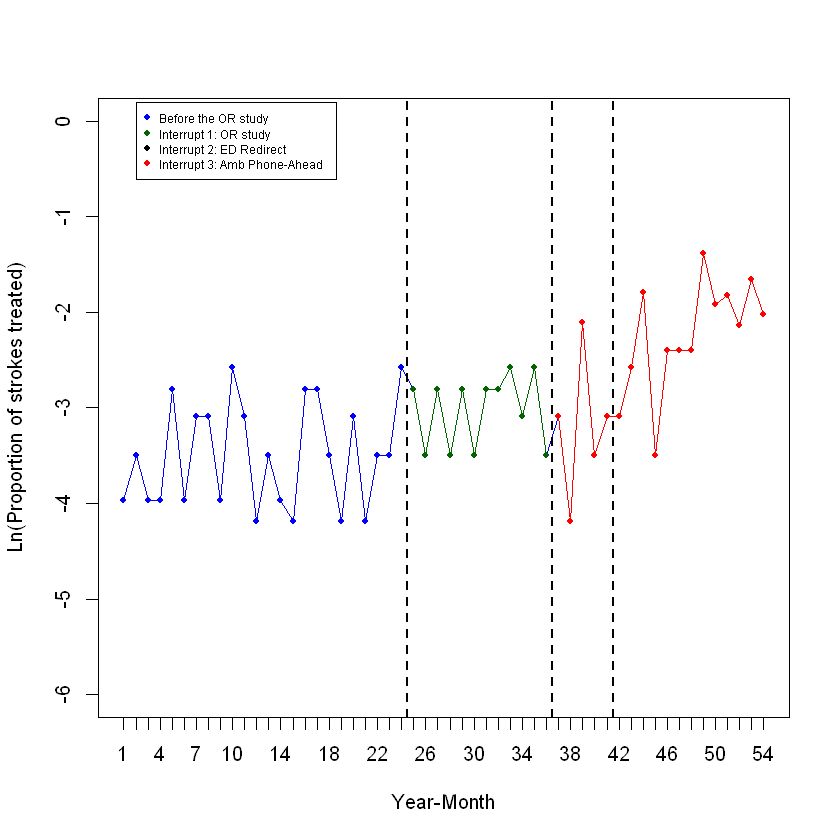

In [5]:
plot(data$time[1:54],data$per_treated[1:54],
     ylab="Ln(Proportion of strokes treated)",
     ylim=c(-6,0),
     xlab="Year-Month",
     type="l",
     col="blue",
     xaxt="n")

#OR study portion of the time series
points(data$time[25:36],data$per_treated[25:36],
       type='l',
       col="dark green")


#ED and Ambulance implementation portion of the time series
points(data$time[37:54],data$per_treated[37:54],
       type='l',
       col="red")

axis(1, at=1:54, labels=data$time[1:54])


# Add in the points for the figure
points(data$time[1:24],data$per_treated[1:24],
       col="blue",
       pch=20)

points(data$time[25:36],data$per_treated[25:36],
       col="dark green",
       pch=20)


points(data$time[37:54],data$per_treated[37:54],
       col="red",
       pch=20)


# Interruption 1 the start of the OR study
abline(v=24.5,lty=2, lwd = 2)

# Interruption 2 ED implementation 
abline(v=36.5,lty=2, lwd = 2)

# Interruption 3 Ambulance implementation 
abline(v=41.5,lty=2, lwd = 2)


# Add in a legend
legend(x=2, y=0.2, legend=c("Before the OR study","Interrupt 1: OR study", "Interrupt 2: ED Redirect", "Interrupt 3: Amb Phone-Ahead"),
       col=c("blue","dark green", "black", "red"),pch=20, cex=0.6, pt.cex = 1)


Interruption 2 does not give sufficient points for an ITS.  

Options 1. Merge interrupts 2 and 3.

Option 2: Include a phase in.  # opt for phase in.

## 2. ITS - Linear Regression using Generalised Least Squares

## 2.1 Modelling a phased-implementation period

Partial implementation of the changes took place at point 37.  However, the full implementation of the recommended changes did not take place at point 41.  

### 2.1.1 Exclude phase-in period and correct other variables

We cannot model the phase-in period with the number of data points available.  
Therefore these points are excluded

In [6]:
phased_data <- data[c(1:36,41:54),]

The trend variable for implementation is begins at 5.  This needs to be restarted at 1.

In [7]:
phased_data$imp_trend[37:50] <- phased_data$imp_trend[37:50] - 4

### 2.1.1 Preliminary Modelling

Initial model of the time series uses OLS.  Residuals of OLS are examined to identify GLS error model.

In [8]:
# A preliminary OLS regression
model_ols <- lm(per_treated ~ time + or + or_trend + imp + imp_trend, data=phased_data)
summary(model_ols)


Call:
lm(formula = per_treated ~ time + or + or_trend + imp + imp_trend, 
    data = phased_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.98653 -0.37002  0.00955  0.31969  0.94836 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.643287   0.210558 -17.303   <2e-16 ***
time         0.011471   0.014736   0.778   0.4405    
or           0.236937   0.319962   0.741   0.4629    
or_trend     0.005911   0.031487   0.188   0.8520    
imp          0.256048   0.458585   0.558   0.5794    
imp_trend    0.073254   0.040980   1.788   0.0807 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4997 on 44 degrees of freedom
Multiple R-squared:  0.5794,	Adjusted R-squared:  0.5316 
F-statistic: 12.12 on 5 and 44 DF,  p-value: 2.07e-07


Remember when interpretting coefficients - dependent variables is logged!

### 2.1.2 Error model identification

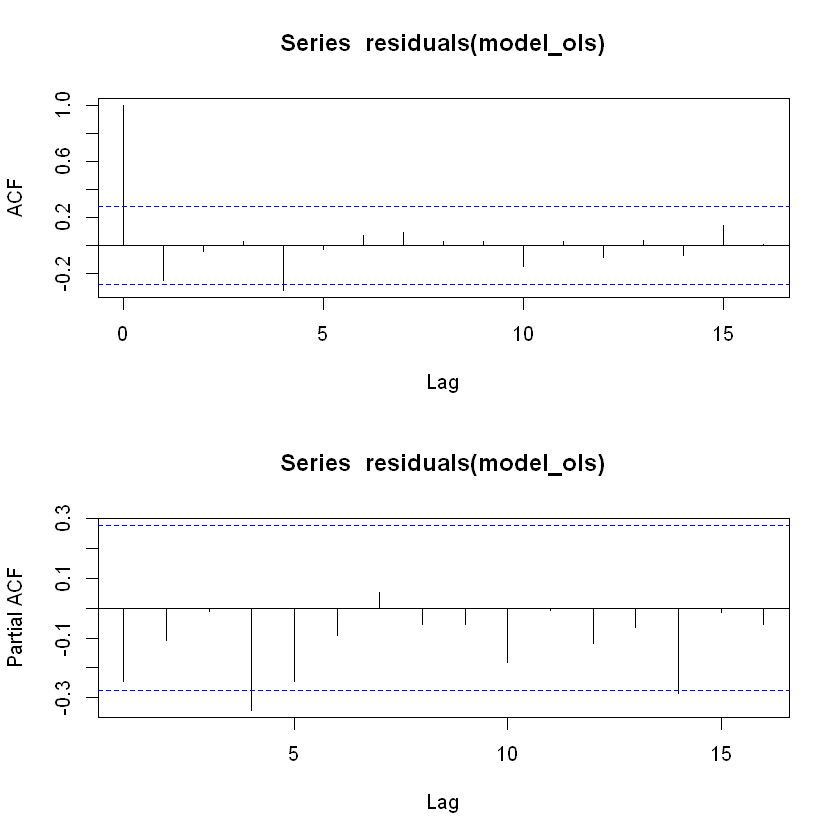

In [9]:
# Plot ACF and PACF
# Set plotting to two records on one page
par(mfrow=c(2,1))

# Produce plots
acf(residuals(model_ols))
acf(residuals(model_ols),type='partial')

Conclusion Try  AR(4) and MA(4); compare to simpler models

## 2.2. GLS modelling

In [12]:
# Fit the GLS regression model
gls_m1<- gls(per_treated ~ time + or + or_trend + imp + imp_trend,
  data=phased_data,
  correlation=corARMA(p=4,form=~time),
  method="ML")
summary(gls_m1)
confint(gls_m1)

Generalized least squares fit by maximum likelihood
  Model: per_treated ~ time + or + or_trend + imp + imp_trend 
  Data: phased_data 
       AIC      BIC    logLik
  78.28534 99.31759 -28.14267

Correlation Structure: ARMA(4,0)
 Formula: ~time 
 Parameter estimate(s):
      Phi1       Phi2       Phi3       Phi4 
-0.3023680 -0.2190522 -0.1265742 -0.3394988 

Coefficients:
                Value Std.Error   t-value p-value
(Intercept) -3.552159 0.1085625 -32.71995  0.0000
time         0.004627 0.0077002   0.60086  0.5510
or           0.374918 0.1986457   1.88737  0.0657
or_trend     0.006466 0.0217067   0.29786  0.7672
imp          0.323155 0.3490916   0.92570  0.3597
imp_trend    0.087438 0.0264132   3.31040  0.0019

 Correlation: 
          (Intr) time   or     or_trn imp   
time      -0.896                            
or         0.357 -0.553                     
or_trend   0.246 -0.241 -0.551              
imp        0.057 -0.091  0.631 -0.888       
imp_trend  0.046 -0.074  0.479 -0

,2.5 %,97.5 %
(Intercept),-3.76493742,-3.33938037
time,-0.01046536,0.01971894
or,-0.01442086,0.76425602
or_trend,-0.03607881,0.04901003
imp,-0.36105246,1.00736162
imp_trend,0.03566924,0.13920717


In [13]:
gls_m2 <- update(gls_m1,correlation=corARMA(q=4, form=~time))
anova(gls_m1,gls_m2)

,call,Model,df,AIC,BIC,logLik
gls_m1,"gls(model = per_treated ~ time + or + or_trend + imp + imp_trend, data = phased_data, correlation = corARMA(p = 4, form = ~time), method = ""ML"")",1,11,78.28534,99.31759,-28.14267
gls_m2,"gls(model = per_treated ~ time + or + or_trend + imp + imp_trend, data = phased_data, correlation = corARMA(q = 4, form = ~time), method = ""ML"")",2,11,71.72262,92.75487,-24.86131


Conclusion.  AIC of ARMA(1,1) is lower and significant.  Check sensitivity of results.

In [14]:
model_final = gls_m2

In [15]:
summary(model_final)

Generalized least squares fit by maximum likelihood
  Model: per_treated ~ time + or + or_trend + imp + imp_trend 
  Data: phased_data 
       AIC      BIC    logLik
  71.72262 92.75487 -24.86131

Correlation Structure: ARMA(0,4)
 Formula: ~time 
 Parameter estimate(s):
     Theta1      Theta2      Theta3      Theta4 
-0.50019608 -0.10628276 -0.05190258 -0.34160518 

Coefficients:
                Value Std.Error   t-value p-value
(Intercept) -3.536434 0.0820388 -43.10687  0.0000
time         0.003360 0.0062340   0.53905  0.5926
or           0.407306 0.1916370   2.12540  0.0392
or_trend     0.004495 0.0201174   0.22344  0.8242
imp          0.380030 0.3434848   1.10640  0.2746
imp_trend    0.087699 0.0261089   3.35899  0.0016

 Correlation: 
          (Intr) time   or     or_trn imp   
time      -0.965                            
or         0.530 -0.667                     
or_trend   0.110 -0.033 -0.657              
imp        0.129 -0.189  0.729 -0.940       
imp_trend  0.114 -0.167  

In [16]:
(exp(model_final$coef[6])-1) * 100

imp_trend 
 9.165996

In [18]:
data

year,month,per_treated,time,or,or_trend,imp,imp_trend,per_treated2,lag1_treat_ln
2009,1,-3.970292,1,0,0,0,0,0.01886793,0.000000
2009,2,-3.496508,2,0,0,0,0,0.03030303,0.000000
2009,3,-3.970292,3,0,0,0,0,0.01886793,0.000000
2009,4,-3.970292,4,0,0,0,0,0.01886793,0.000000
2009,5,-2.803360,5,0,0,0,0,0.06060606,0.000000
2009,6,-3.970292,6,0,0,0,0,0.01886793,0.000000
2009,7,-3.091042,7,0,0,0,0,0.04545454,0.000000
2009,8,-3.091042,8,0,0,0,0,0.04545454,0.000000
2009,9,-3.970292,9,0,0,0,0,0.01886793,0.000000
2009,10,-2.580217,10,0,0,0,0,0.07575758,0.000000


## 2.3 Visual Presentation of ITS Analysis

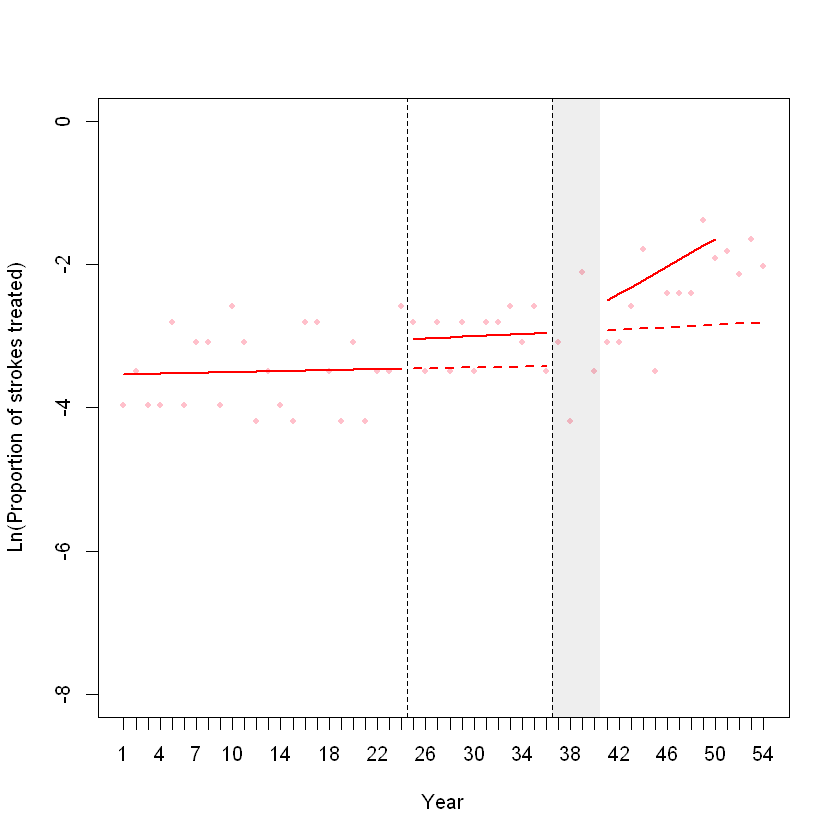

In [29]:
# Produce the plot, first plotting the raw data points
plot(data$time,data$per_treated,
     ylim=c(-8,0),
     ylab="Ln(Proportion of strokes treated)",
     xlab="Year",
     pch=20,
     col="pink",
     xaxt="n")

# Add x axis with dates
#axis(1, at=1:35, labels=data$year)

# interruption 1 - OR Study + ED (Jan 2011)
abline(v=24.5,lty=2)

#interruption 2 - Ambulance (July 2012)
abline(v=36.5,lty=2)

# The before line
lines(data$time[1:24], fitted(model_final)[1:24], col="red",lwd=2)

# The Or study line 
lines(data$time[25:36], fitted(model_final)[25:36], col="red",lwd=2)

#The implementation line (must need to draw line as it follows a phase in period)
lines(data$time[41:54], fitted(model_final)[41:54], col="red",lwd=2)


axis(1, at=1:54, labels=data$time[1:54])

#Line representing counterfactual to ED implementation
segments(25, model_final$coef[1]+model_final$coef[2]*25,
         36, model_final$coef[1]+model_final$coef[2]*36,
         lty=2, lwd=2, col='red')


# Line representing counterfactual to the ambulance implementation
segments(41, model_final$coef[1] + model_final$coef[2]*41 +
           model_final$coef[3] + model_final$coef[4]*15,
         54, model_final$coef[1] + model_final$coef[2]*54 +
           model_final$coef[3] + model_final$coef[4]*30,
         lty=2, lwd=2, col='red')



# Phase-in period
rect(40.5,-500,36.5,5000 , border = NA, col= '#00000011')


In [28]:
fitted(model_final)[49]

53 
-1.739044

## 3. Interrupted Time Series Analysis using ARIMA (single series)

**Building the ARIMA model**

We will use the first 25 points in the time series to build the ARIMA model.  This is because we know that there were interventions at point 26 and point 41.  The selected ARIMA model is then applied to the full series and intervention terms.

A sample 25 points is **potentially** problematic for building the ARIMA model.  The more samples the better. 

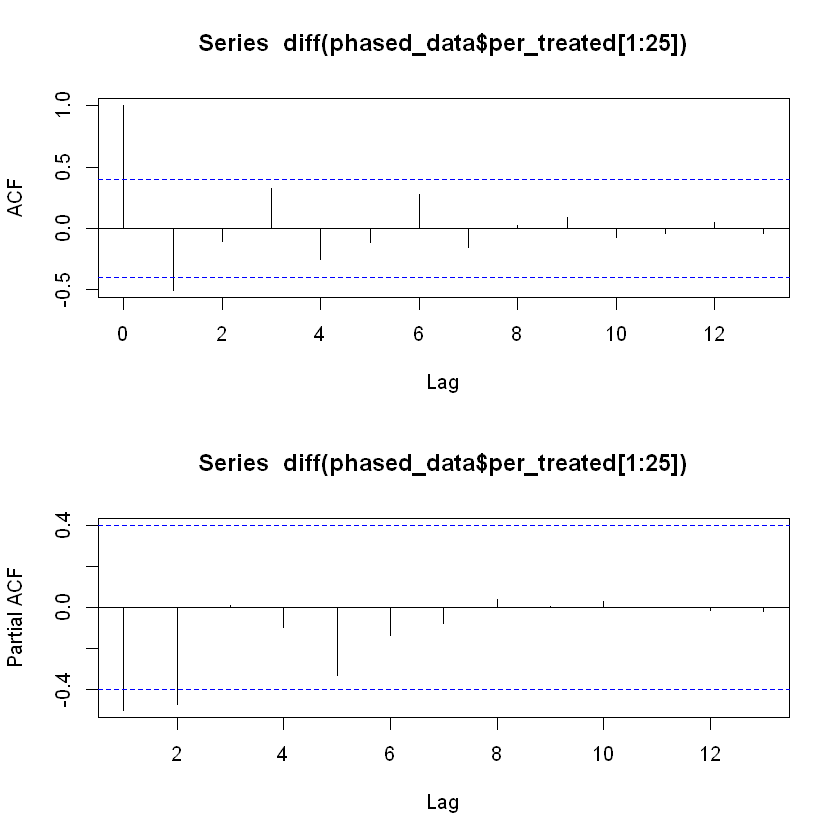

In [28]:
# Plot ACF and PACF
# Set plotting to two records on one page
par(mfrow=c(2,1))

# Produce plots
acf(diff(phased_data$per_treated[1:25]))
acf(diff(phased_data$per_treated[1:25]),type='partial')

In [103]:
arima_m1 = arima(ts(data$per_treated[1:25]), order=c(0,1,1))
coeftest(arima_m1)
AIC(arima_m1)

arima_m2 = arima(ts(data$per_treated[1:25]), order=c(1,1,0))
coeftest(arima_m2)
AIC(arima_m2)

arima_m3 = arima(ts(data$per_treated[1:25]), order=c(0,1,2))
coeftest(arima_m3)
AIC(arima_m3)

arima_m4 = arima(ts(data$per_treated[1:25]), order=c(1,1,1))
coeftest(arima_m4)
AIC(arima_m4)



z test of coefficients:

    Estimate Std. Error z value  Pr(>|z|)    
ma1 -1.00000    0.20252 -4.9378 7.901e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


[1] 47.45153


z test of coefficients:

    Estimate Std. Error z value Pr(>|z|)   
ar1 -0.48604    0.17266 -2.8151 0.004877 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


[1] 54.99657


z test of coefficients:

     Estimate Std. Error z value Pr(>|z|)   
ma1 -1.055389   0.328018 -3.2175 0.001293 **
ma2  0.055411   0.239957  0.2309 0.817377   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


[1] 49.39779


z test of coefficients:

     Estimate Std. Error z value  Pr(>|z|)    
ar1 -0.044611   0.213347 -0.2091    0.8344    
ma1 -0.999999   0.219255 -4.5609 5.094e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


[1] 49.40805

Conclusion - select I(1) MA(1)

In [31]:
plot_diag <- function(model){
    par(mfrow=c(2,1))
    acf(model$residuals, lag.max=48)
    pacf(model$residuals, lag.max=48)
    #library(FitAR)
    Box.Ljung.Test(model$residuals, lag = 24)
    #boxresult=LjungBoxTest(dtoc.m1$residuals,k=2,StartLag=1)
    #plot(boxresult[,3],main= "Ljung-Box Q Test", ylab= "P-values", xlab= "Lag")
    qqnorm(model$residuals)
    qqline(model$residuals)
    }

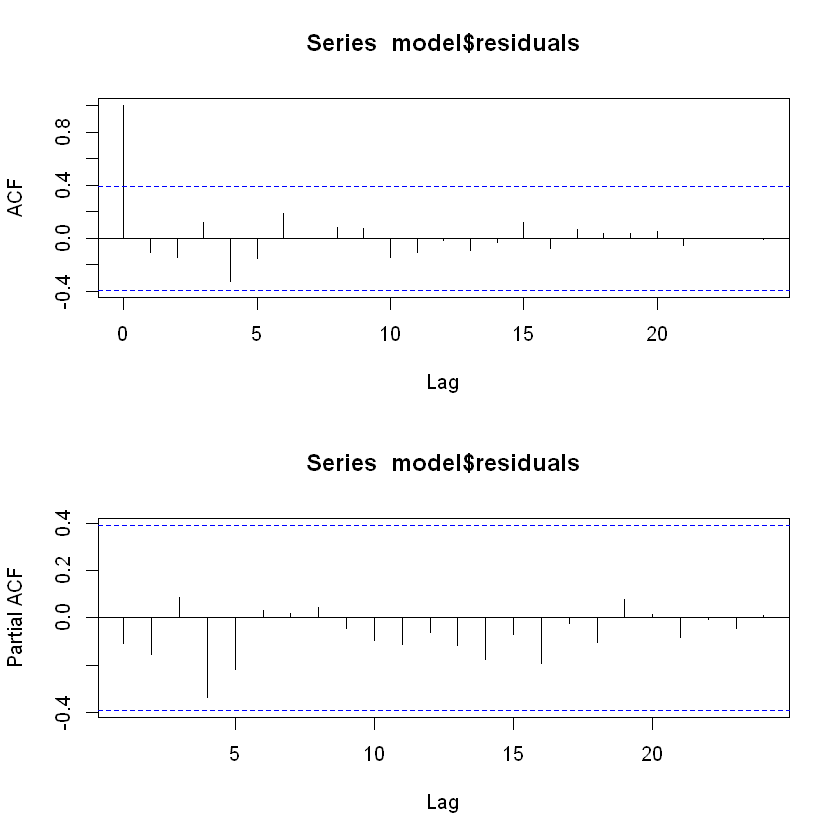

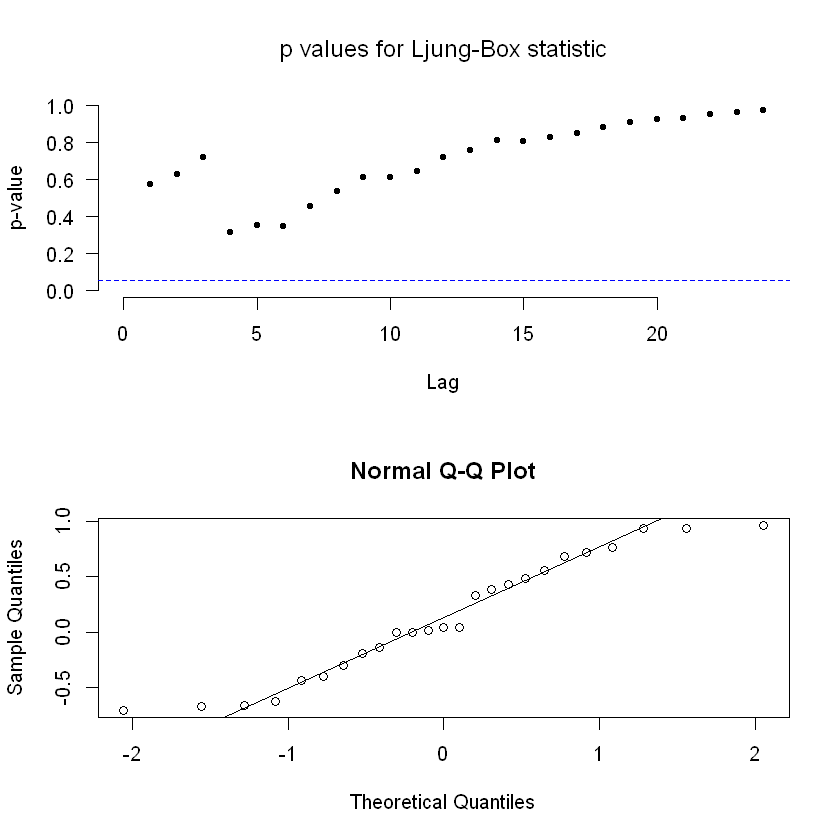

In [112]:
plot_diag(arima_m1)

In [85]:
Treat_Rate = ts(phased_data$per_treated)
OR_Intervention = ts(phased_data$or)
Implementation = ts(phased_data$imp)
Imp_Rate = ts(phased_data$lag1_ln_per_treated)

In [105]:
intervention_m1 = arima(Treat_Rate, order=c(0,1,1), 
                 xreg=data.table(OR_Intervention, Implementation))
intervention_m1
coeftest(intervention_m1)


Call:
arima(x = Treat_Rate, order = c(0, 1, 1), xreg = data.table(OR_Intervention, 
    Implementation))

Coefficients:
          ma1  OR_Intervention  Implementation
      -0.9999           0.4733          0.7883
s.e.   0.0634           0.1752          0.1996

sigma^2 estimated as 0.259:  log likelihood = -38.38,  aic = 84.76


z test of coefficients:

                 Estimate Std. Error  z value  Pr(>|z|)    
ma1             -0.999894   0.063352 -15.7831 < 2.2e-16 ***
OR_Intervention  0.473272   0.175244   2.7006   0.00692 ** 
Implementation   0.788320   0.199599   3.9495 7.831e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [58]:
exp(intervention_m1$coef[2])
exp(intervention_m1$coef[3])

OR_Intervention 
       1.613988

Implementation 
      2.058944

OR intervention ~ 61% increase in treatment rate
Full implementation - 105% increase in treatment rate over expected.

In [113]:
intervention_m2 = arima(Treat_Rate, order=c(0,1,1), 
                        
                 xreg=data.table(OR_Intervention, Implementation, I_Rate))
intervention_m2
coeftest(intervention_m2)


Call:
arima(x = Treat_Rate, order = c(0, 1, 1), xreg = data.table(OR_Intervention, 
    Implementation, I_Rate))

Coefficients:
          ma1  OR_Intervention  Implementation  I_Rate
      -1.0000           0.4733          1.3085  0.2241
s.e.   0.0581           0.1736          0.5749  0.2326

sigma^2 estimated as 0.2541:  log likelihood = -37.92,  aic = 85.84


z test of coefficients:

                 Estimate Std. Error  z value  Pr(>|z|)    
ma1             -0.999985   0.058121 -17.2053 < 2.2e-16 ***
OR_Intervention  0.473333   0.173607   2.7265  0.006402 ** 
Implementation   1.308485   0.574855   2.2762  0.022834 *  
I_Rate           0.224105   0.232635   0.9633  0.335379    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [102]:
exp(intervention_m2$coef[3])
exp(intervention_m2$coef[4])

exp(intervention_m2$coef[3] / (1 - intervention_m2$coef[4]))

Implementation 
      3.700565

I_Rate 
1.251203

Implementation 
      5.400122

Gradual change leading to a 4.4 times as many patients being treated.

Issues.  The Imp_Rate variable is not significant.  

### Final check of model diagnostics

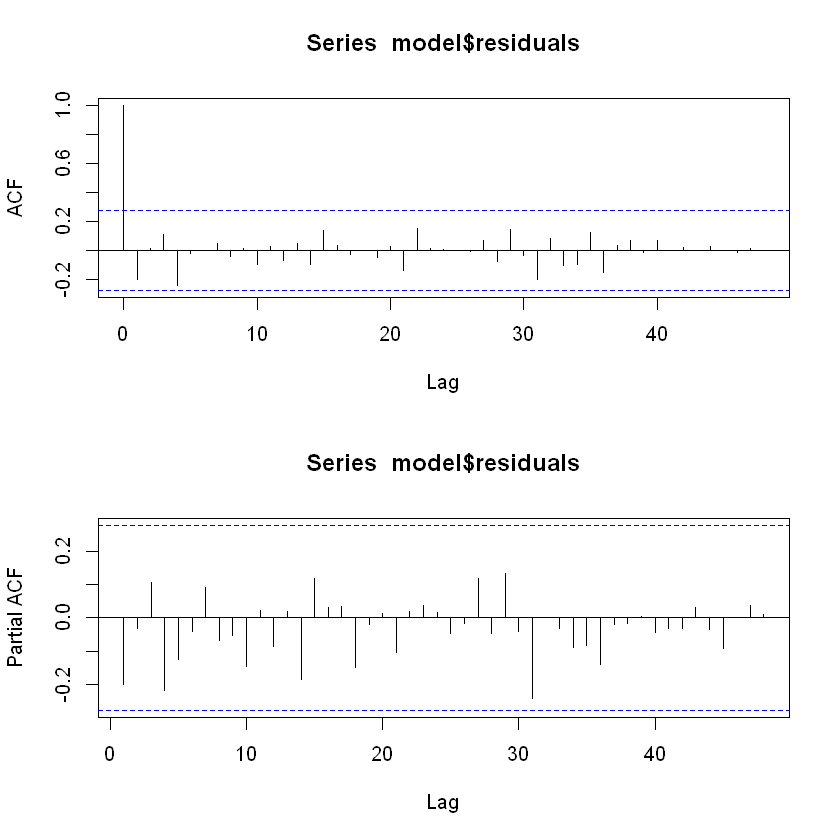

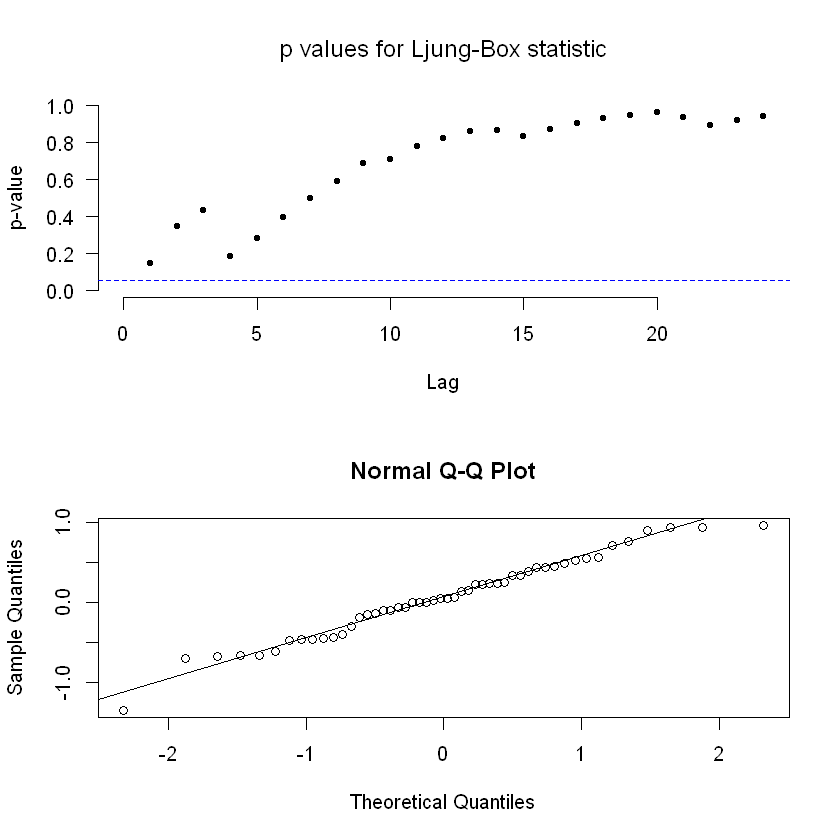

In [109]:
plot_diag(intervention_m2)

Conclusion - in general okay.  Potentially some outlying residuals at the far end of the distributions